<a href="https://colab.research.google.com/github/Adityav369/db_generate/blob/master/LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [45]:
import math
import matplotlib.pyplot as plt
import keras
import pandas as pd
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
from keras.layers import *
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
from keras.callbacks import EarlyStopping

In [46]:
def getData():
  df = pd.read_csv("AAPL.csv")
  train = df.iloc[:1000, 1:2].values
  test = df.iloc[1000:, 1:2].values
  return train, train_test_split


In [47]:
def scaleData(train, test):
  # Feature Scaling
  sc = MinMaxScaler(feature_range = (0, 1))
  train_scaled = sc.fit_transform(train)
  # Creating a data structure with 60 time-steps and 1 output
  X_train = []
  y_train = []
  for i in range(60, 1000):
      X_train.append(train_scaled[i-60:i, 0])
      y_train.append(train_scaled[i, 0])
  X_train, y_train = np.array(X_train), np.array(y_train)
  X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

In [48]:
model = Sequential()
#Adding the first LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
model.add(Dropout(0.2))
# Adding a second LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50, return_sequences = True))
model.add(Dropout(0.2))
# Adding a third LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50, return_sequences = True))
model.add(Dropout(0.2))
# Adding a fourth LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50))
model.add(Dropout(0.2))
# Adding the output layer
model.add(Dense(units = 1))

# Compiling the RNN
model.compile(optimizer = 'adam', loss = 'mean_squared_error')

# Fitting the RNN to the Training set
model.fit(X_train, y_train, epochs = 100, batch_size = 32)

Epoch 1/100
30/30 [==============================] - 11s 133ms/step - loss: 0.0207
Epoch 2/100
30/30 [==============================] - 6s 195ms/step - loss: 0.0042
Epoch 3/100
30/30 [==============================] - 10s 328ms/step - loss: 0.0029
Epoch 4/100
30/30 [==============================] - 7s 235ms/step - loss: 0.0028
Epoch 5/100
30/30 [==============================] - 7s 234ms/step - loss: 0.0032
Epoch 6/100
30/30 [==============================] - 5s 179ms/step - loss: 0.0030
Epoch 7/100
30/30 [==============================] - 6s 209ms/step - loss: 0.0025
Epoch 8/100
30/30 [==============================] - 6s 186ms/step - loss: 0.0025
Epoch 9/100
30/30 [==============================] - 6s 209ms/step - loss: 0.0025
Epoch 10/100
30/30 [==============================] - 4s 132ms/step - loss: 0.0027
Epoch 11/100
30/30 [==============================] - 4s 127ms/step - loss: 0.0023
Epoch 12/100
30/30 [==============================] - 4s 128ms/step - loss: 0.0024
Epoch 13/10

In [52]:
dataset_train = df.iloc[:1000, 1:2]
dataset_test = df.iloc[1000:, 1:2]
dataset_total = pd.concat((dataset_train, dataset_test), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
for i in range(60, 1000):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
print(X_test.shape)
# (459, 60, 1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  # Remove the CWD from sys.path while we load stuff.


IndexError: ignored

In [51]:
predicted_stock_price = model.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

ValueError: ignored

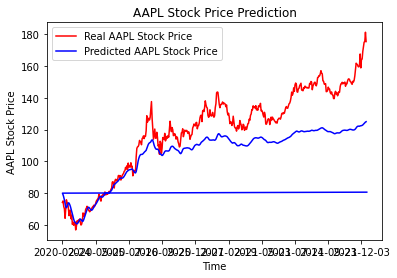

In [34]:
# Visualising the results
plt.plot(df.loc[800:, 'Date'],dataset_test.values, color = 'red', label = 'Real AAPL Stock Price')
plt.plot(df.loc[799:, 'Date'],predicted_stock_price, color = 'blue', label = 'Predicted AAPL Stock Price')
plt.xticks(np.arange(0,459,50))
plt.title('AAPL Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('AAPL Stock Price')
plt.legend()
plt.show()